# MNIST Dataset with Support Vector Machine
# You should always scale the data for SVM. Here I'm looking at the difference in accuracy when scaling and without scaling the data

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Functions

In [55]:
def display_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot()

# Dataset and EDA

In [56]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

X = mnist["data"]
y = mnist["target"].astype(np.uint8)

c:\Users\debbi\NLP\envNLP\lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [57]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [58]:
# Only using a part of the dataset 
X_train = X[:5000]
y_train = y[:5000]
X_test = X[5000:6000]
y_test = y[5000:6000]

# Standardizing the data.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  



In [59]:
# Looking at the first number
y[0]

5

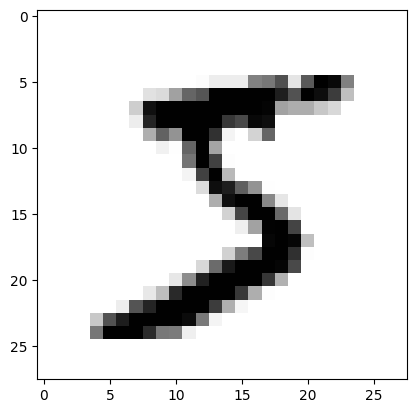

In [60]:
# Plotting the number
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)


In [61]:
print(X_train.shape)
print(y_train.shape)

(5000, 784)
(5000,)


# Creating a simple modell and evaluating it on the test set
# Model with scaled data

In [62]:
lin_clf = LinearSVC(random_state=42)

In [63]:
lin_clf.fit(X_train_scaled, y_train)

c:\Users\debbi\NLP\envNLP\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\debbi\NLP\envNLP\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=42)

In [64]:
lin_pred = lin_clf.predict(X_test_scaled)

In [65]:
accuracy_score(y_test, lin_pred)

0.844

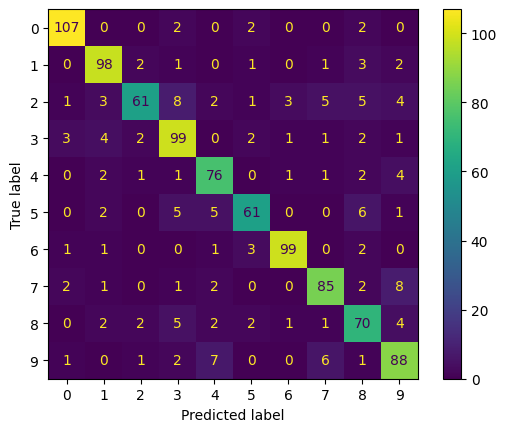

In [66]:
display_confusion_matrix(y_test, lin_pred)

# Good results! Let's do this again but this time with unscaled data

In [67]:
lin_unscaled = LinearSVC(random_state=42)

In [68]:
lin_unscaled.fit(X_train, y_train)

c:\Users\debbi\NLP\envNLP\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\debbi\NLP\envNLP\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=42)

In [69]:
lin_pred_unscaled = lin_clf.predict(X_test)

In [70]:
accuracy_score(lin_pred_unscaled, y_test)

0.587

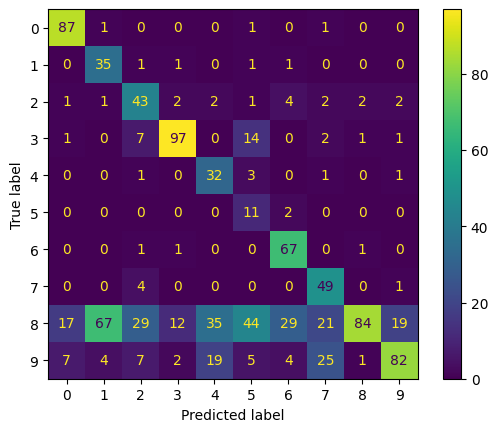

In [71]:
display_confusion_matrix(lin_pred_unscaled, y_test)

# Poorly results
# I will now refine the model with hyperparameters by using GridSearch


In [72]:
svm_clf = SVC()

In [73]:
hyper_param_grid = [
 {'kernel': ['rbf', 'poly'], 'gamma': [1, 2], 'C': [0.5, 1, 1.5]}
]

In [74]:
grid_search = GridSearchCV(svm_clf, hyper_param_grid, cv = 3)


In [75]:
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid=[{'C': [0.5, 1, 1.5], 'gamma': [1, 2],
                          'kernel': ['rbf', 'poly']}])

In [76]:
grid_search.best_params_

{'C': 0.5, 'gamma': 1, 'kernel': 'poly'}

In [77]:
predicted = grid_search.predict(X_test_scaled)

In [78]:
accuracy_score(y_test, predicted)

0.94

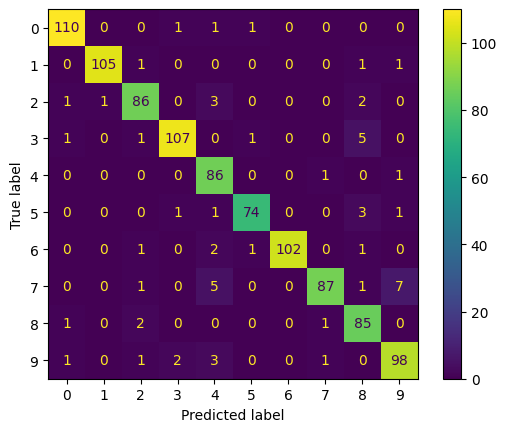

In [79]:
display_confusion_matrix(y_test, predicted)

In [80]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       113
           1       0.99      0.97      0.98       108
           2       0.92      0.92      0.92        93
           3       0.96      0.93      0.95       115
           4       0.85      0.98      0.91        88
           5       0.96      0.93      0.94        80
           6       1.00      0.95      0.98       107
           7       0.97      0.86      0.91       101
           8       0.87      0.96      0.91        89
           9       0.91      0.92      0.92       106

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.94      0.94      0.94      1000

